In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.optimize import minimize
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import pandas as pd

import sys
sys.path.append("../")
from bargains_linear import * 

In [2]:
def gen_beta_plot(params):
    
    active_result = pd.DataFrame(columns=['phi1','phi2','p1','p2','s1','s2','beta1','beta2'])
    seq_result = pd.DataFrame(columns=['phi1','phi2','p1','p2','s1','s2','beta1','beta2'])
    nobs = 5
    np.linspace(.05,.5,)
    
    for param in params:
        #seq results
        wtp,cost,beta1,beta2,mc1,mc2=param
        mc = np.array([mc1,mc2])
        phi1,phi2 = seq_bargain(25,cost,wtp,mc,betas=[beta1,beta2])
        phi1,phi2,p1,p2,s1,s2 = solve_eq(phi1,phi2,cost,wtp,mc)
        row = pd.DataFrame(columns=['phi1','phi2','p1','p2','s1','s2','beta1','beta2'],data=[[phi1,phi2,p1,p2,s1,s2,beta1,beta2]])
        seq_result = pd.concat( [seq_result, row] )

        #active results
        phi1,phi2 =simult_bargain(25,25, cost,wtp,mc, active=True,betas=[beta1,beta2])
        phi1,phi2,p1,p2,s1,s2 = solve_eq(phi1,phi2,cost,wtp,mc)
        row = pd.DataFrame(columns=['phi1','phi2','p1','p2','s1','s2','beta1','beta2'],data=[[phi1,phi2,p1,p2,s1,s2,beta1,beta2]])
        active_result = pd.concat( [active_result, row] )



    return seq_result, active_result


nobs = 10
beta1s = np.linspace(.5,.9,nobs)
beta2s = np.linspace(.05,.5,nobs)

param_list1 = []
param_list2 = []
for i in range(nobs):
    param_list1.append([25,5,beta1s[i],.5,0,0])
    param_list2.append([25,5,.5,beta2s[i],0,0])


seq_result1,active_result1 = gen_beta_plot(param_list1)
seq_result2,active_result2 = gen_beta_plot(param_list2)

In [3]:
print(seq_result1)
print(active_result1)

        phi1       phi2         p1         p2        s1        s2     beta1  \
0  15.627693  19.378171  21.877852  23.128011  0.625016  0.374984  0.500000   
0  14.477724  18.227970  20.727806  21.977888  0.625008  0.374992  0.544444   
0  13.502480  17.252583  19.752514  21.002549  0.625003  0.374997  0.588889   
0  12.664536  16.414515  18.914529  20.164522  0.624999  0.375001  0.633333   
0  11.936528  15.686542  18.186532  19.436537  0.625000  0.375000  0.677778   
0  11.298115  15.048135  17.548122  18.798129  0.625001  0.374999  0.722222   
0  10.733708  14.483749  16.983721  18.233735  0.625001  0.374999  0.766667   
0  10.231185  13.981204  16.481191  17.731198  0.625001  0.374999  0.811111   
0   9.780817  13.530842  16.030825  17.280833  0.625001  0.374999  0.855556   
0   9.374990  13.125029  15.625003  16.875016  0.625001  0.374999  0.900000   

   beta2  
0    0.5  
0    0.5  
0    0.5  
0    0.5  
0    0.5  
0    0.5  
0    0.5  
0    0.5  
0    0.5  
0    0.5  
        p

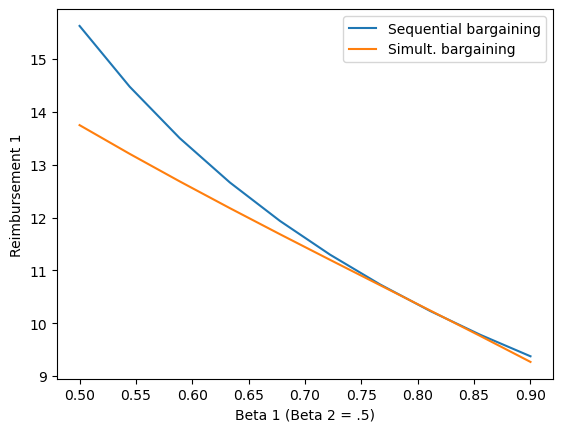

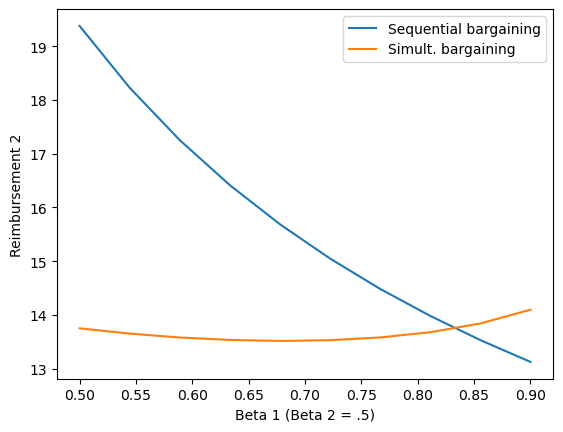

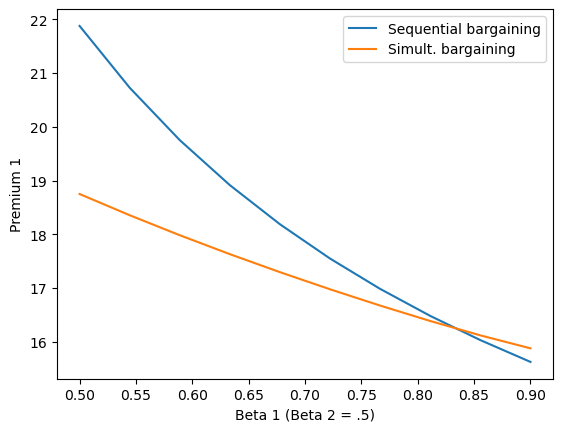

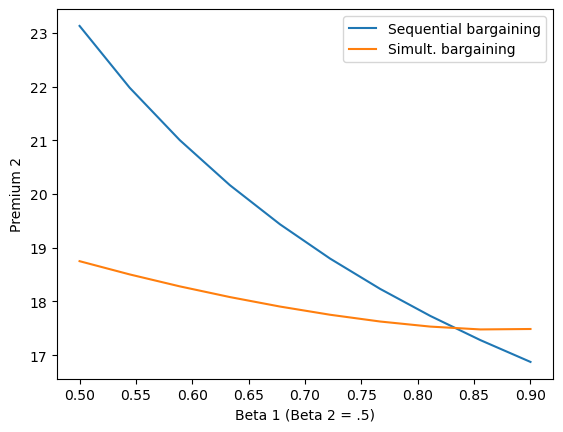

In [4]:
for outcome in [('phi1','Reimbursement 1'),('phi2','Reimbursement 2'),('p1','Premium 1'),('p2','Premium 2')]:

    plt.plot(seq_result1['beta1'],seq_result1[outcome[0]],label='Sequential bargaining')
    plt.plot(active_result1['beta1'],active_result1[outcome[0]],label='Simult. bargaining')
    plt.xlabel('Beta 1 (Beta 2 = .5)')
    plt.ylabel(outcome[1])
    plt.legend()
    plt.savefig('figs/beta2_'+ outcome[0]+'.png')
    plt.show()

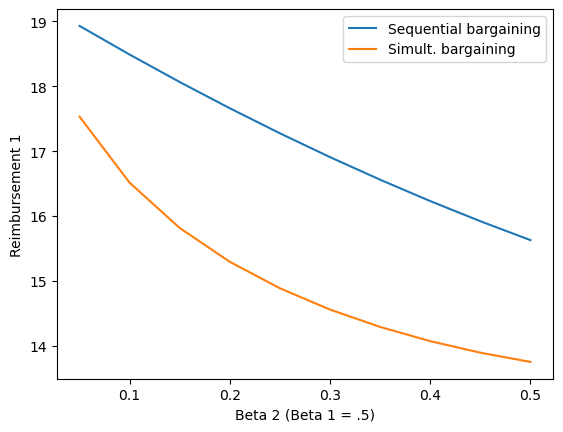

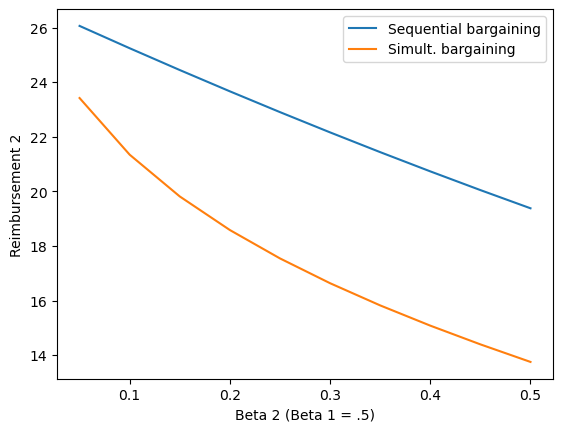

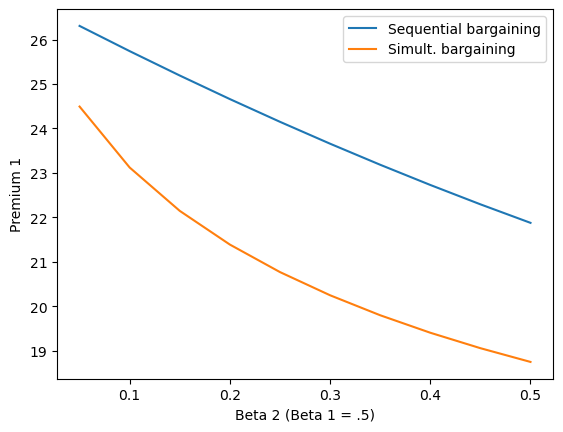

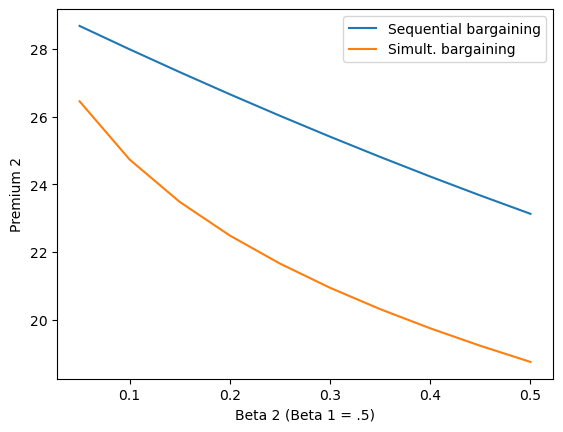

In [5]:
for outcome in [('phi1','Reimbursement 1'),('phi2','Reimbursement 2'),('p1','Premium 1'),('p2','Premium 2')]:

    plt.plot(seq_result2['beta2'],seq_result2[outcome[0]],label='Sequential bargaining')
    plt.plot(active_result2['beta2'],active_result2[outcome[0]],label='Simult. bargaining')
    plt.xlabel('Beta 2 (Beta 1 = .5)')
    plt.ylabel(outcome[1])
    plt.legend()
    plt.savefig('figs/beta1_'+ outcome[0]+'.png')
    plt.show()